## Investigación del Mercado Automotriz

In [2]:
# Importamos librerías a utilizar
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics

## Extrayendo el Dataset

In [3]:
cars = pd.read_csv("Dataset/ML_cars.csv")
cars.shape

(205, 26)

In [5]:
#Obtenemos estadisticas descriptivas y tipo de datos
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Transformación del dataset 

In [7]:
# Buscamos datos nulos 
cars.isnull().sum()


# Buscamos duplicados
df_duplicated_cars= cars.loc[cars['car_ID'].duplicated(keep=False)]
print("registros duplicados en cars(car_ID): ")

registros duplicados en cars(car_ID): 


In [8]:
# Corrección de datos
cars[['Marca', 'Modelo']] = cars['CarName'].str.split(' ', n=1, expand=True)
errados = ['alfa-romero','maxda','Nissan','porcshce','toyouta','vokswagen', 'volkswagen']
correctos = ['alfa-romeo','mazda','nissan','porsche','toyota','vw','vw']
dicMarca = dict(zip(errados, correctos))

# Reemplazo de datos
cars['Marca'] = cars['Marca'].replace(dicMarca)

In [9]:
cars.cylindernumber.unique()
cars.doornumber.unique()

array(['two', 'four'], dtype=object)

In [11]:
cars.cylindernumber = cars.cylindernumber.str.lower()

def replace_name(a,b):
    cars.cylindernumber.replace(a,b,inplace=True)

replace_name('four','4')
replace_name('five','5')
replace_name('six','6')
replace_name('three','3')
replace_name('twelve','12')
replace_name("two", "2")
replace_name("eight","8")

cars.cylindernumber.unique().astype(int)

array([ 4,  6,  5,  3, 12,  2,  8])

In [12]:
cars.doornumber = cars.doornumber.str.lower()

def replace_name(a,b):
    cars.doornumber.replace(a,b,inplace=True)

replace_name("two", "2")
replace_name("four","4")

cars.doornumber.unique().astype(int)

array([2, 4])

## Análisis Exploratorio de Datos

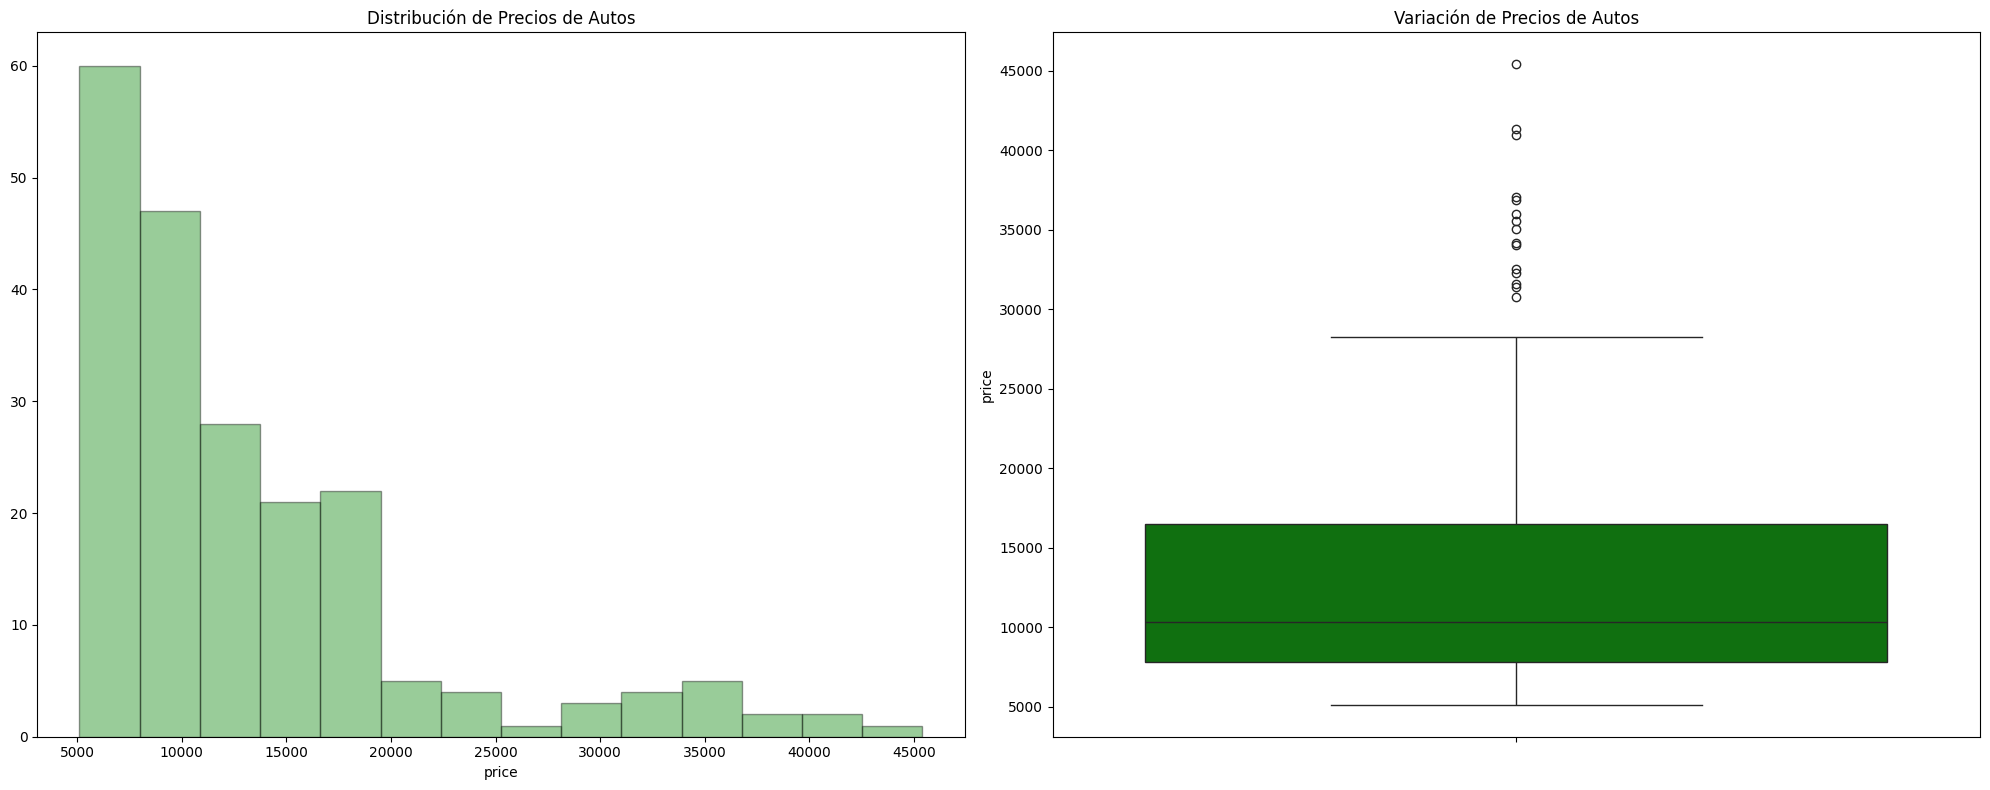

In [13]:
# Creación de la figura y subgráficos
plt.figure(figsize=(20, 8))

# Subgráfico 1: Histograma de Precios de Autos
plt.subplot(1, 2, 1)
plt.title('Distribución de Precios de Autos')
sns.distplot(cars.price, color='green', kde=False, hist_kws=dict(edgecolor="black"))

# Subgráfico 2: Diagrama de Caja de Precios de Autos
plt.subplot(1, 2, 2)
plt.title('Variación de Precios de Autos')
sns.boxplot(y=cars.price, color='green')

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

### A continuación, se presentan algunas observaciones derivadas del análisis:

* La distribución de precios en el conjunto de datos parece sesgarse hacia la derecha, sugiriendo que la mayoría de los precios de los automóviles se sitúan en el segmento de valores más bajos (inferiores a 15,000).

* Se evidencia una marcada discrepancia entre el valor medio y la mediana de la distribución de precios, indicando una posible presencia de asimetría.

* La presencia de valores atípicos, notables por su considerable distancia respecto a la media, señala una variabilidad significativa en los precios de los automóviles. En detalle, el 85% de los precios se ubican por debajo de 18,500, mientras que el 15% restante abarca el intervalo de 18,500 a 45,400. Este hallazgo subraya la amplia gama de precios que caracteriza al conjunto de datos.

## Variables Categoricas

- CarName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

In [14]:
variables_categoricas = ["Marca", "fueltype",'aspiration','carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

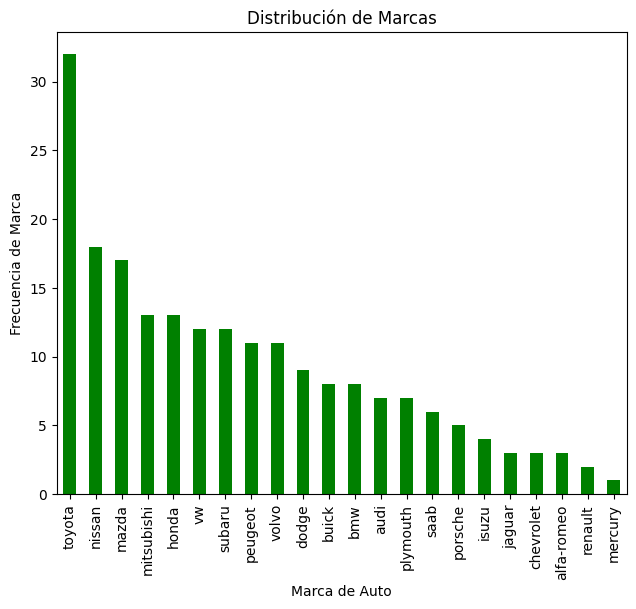

In [15]:
plt.figure(figsize=(25, 6))

# Subgráfico 1: Histograma de Marcas
plt.subplot(1, 3, 1)
plt1 = cars['Marca'].value_counts().plot(kind='bar', color='green')
plt.title('Distribución de Marcas')
plt1.set(xlabel='Marca de Auto', ylabel='Frecuencia de Marca')

# Mostrar el gráfico
plt.show()

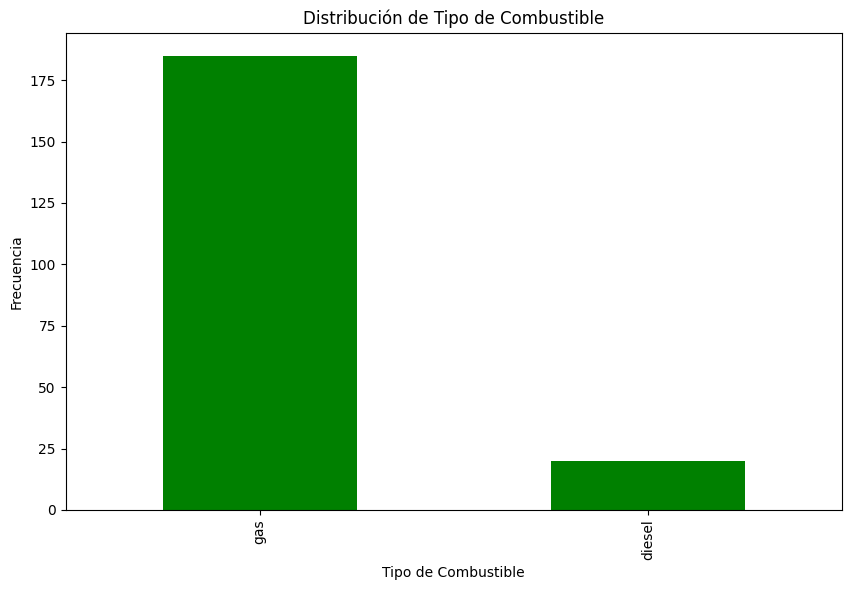

In [16]:
# Creación de la figura y subgráfico
plt.figure(figsize=(25, 6))

# Subgráfico 2: Histograma de Tipo de Combustible
plt.subplot(1, 3, 2)
plt1 = cars['fueltype'].value_counts().plot(kind='bar', color='green')
plt.title('Distribución de Tipo de Combustible')
plt1.set(xlabel='Tipo de Combustible', ylabel='Frecuencia')

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

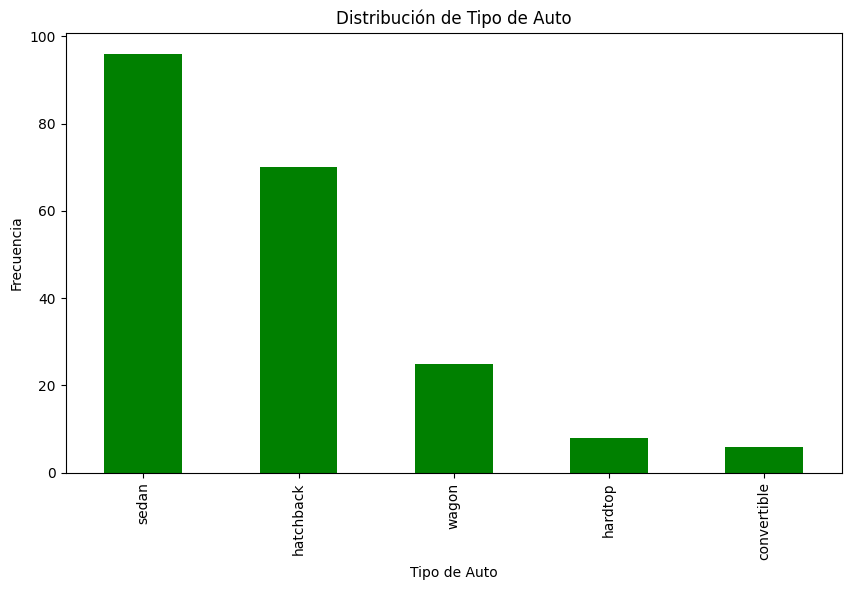

In [17]:
# Creación de la figura y subgráfico
plt.figure(figsize=(25, 6))

# Subgráfico 3: Histograma Tipo de Auto
plt.subplot(1, 3, 3)
plt1 = cars['carbody'].value_counts().plot(kind='bar', color='green')
plt.title('Distribución de Tipo de Auto')
plt1.set(xlabel='Tipo de Auto', ylabel='Frecuencia')

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

### Conclusiones:

* Preferencia de Marca:
Entre las marcas de automóviles analizadas, Toyota destaca como la preferida por los consumidores. Esta conclusión se basa en la frecuencia de aparición de vehículos de la marca Toyota en el conjunto de datos.

* Tipo de Combustible:
El análisis revela que hay una mayor cantidad de automóviles que funcionan con nafta en comparación con los que utilizan motores diésel. Esta observación sugiere una inclinación notable de los consumidores hacia los vehículos a nafta en la muestra analizada.

* Preferencia de Tipo de Automóvil:
En cuanto a las preferencias de tipo de automóvil, los resultados indican que el sedán es el tipo más popular entre los consumidores. Esta conclusión se deriva de la frecuencia de vehículos sedán presentes en el conjunto de datos, señalando una preferencia generalizada por este estilo de automóvil.

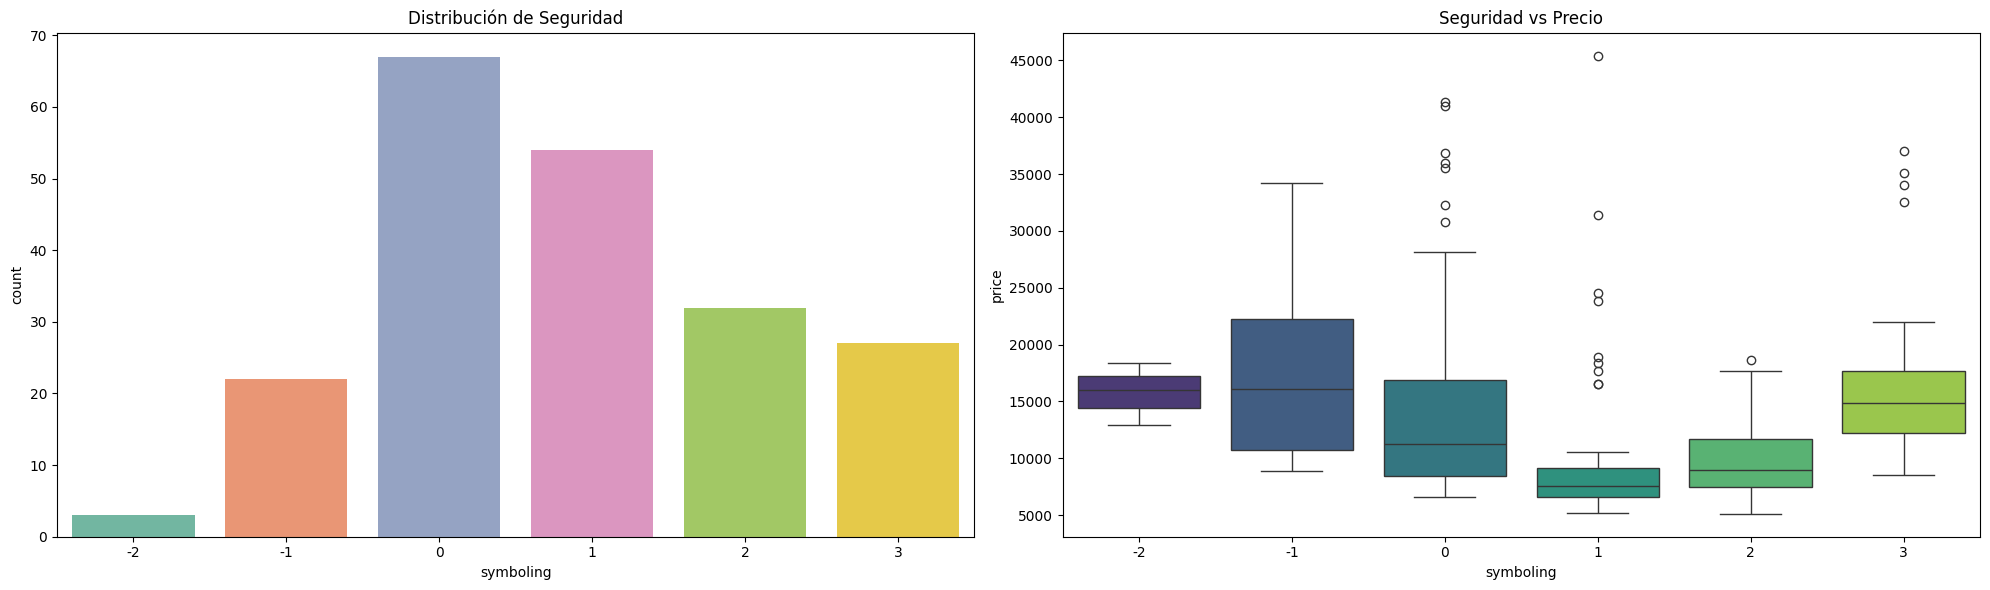

In [18]:
# Creación de la figura y subgráfico
plt.figure(figsize=(20, 6))

# Subgráfico 1: Histograma de Seguridad
plt.subplot(1, 2, 1)
plt.title('Distribución de Seguridad')
sns.countplot(data=cars, x='symboling', palette="Set2")

# Subgráfico 2: Seguridad vs Precio
plt.subplot(1, 2, 2)
plt.title('Seguridad vs Precio')
sns.boxplot(x=cars.symboling, y=cars.price, palette="viridis")

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

### Conclusión:
- La relación entre los niveles de seguridad y los precios de los automóviles sugiere que a medida que aumenta el nivel de seguridad, también tiende a aumentar el precio. Este hallazgo indica una asociación positiva entre la seguridad de los automóviles y su costo, destacando la importancia que los consumidores asignan a características de seguridad más avanzadas al elegir un vehículo.

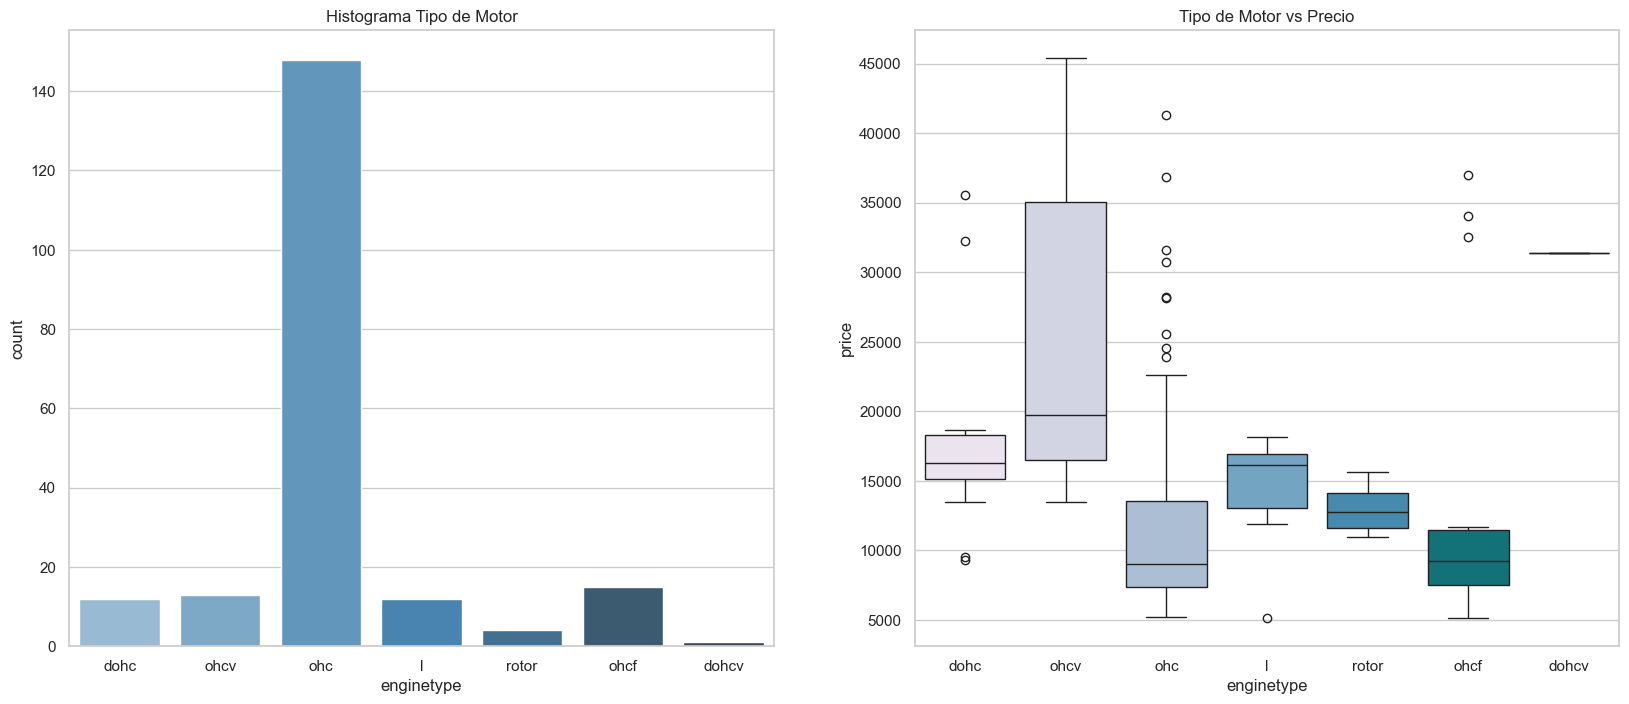

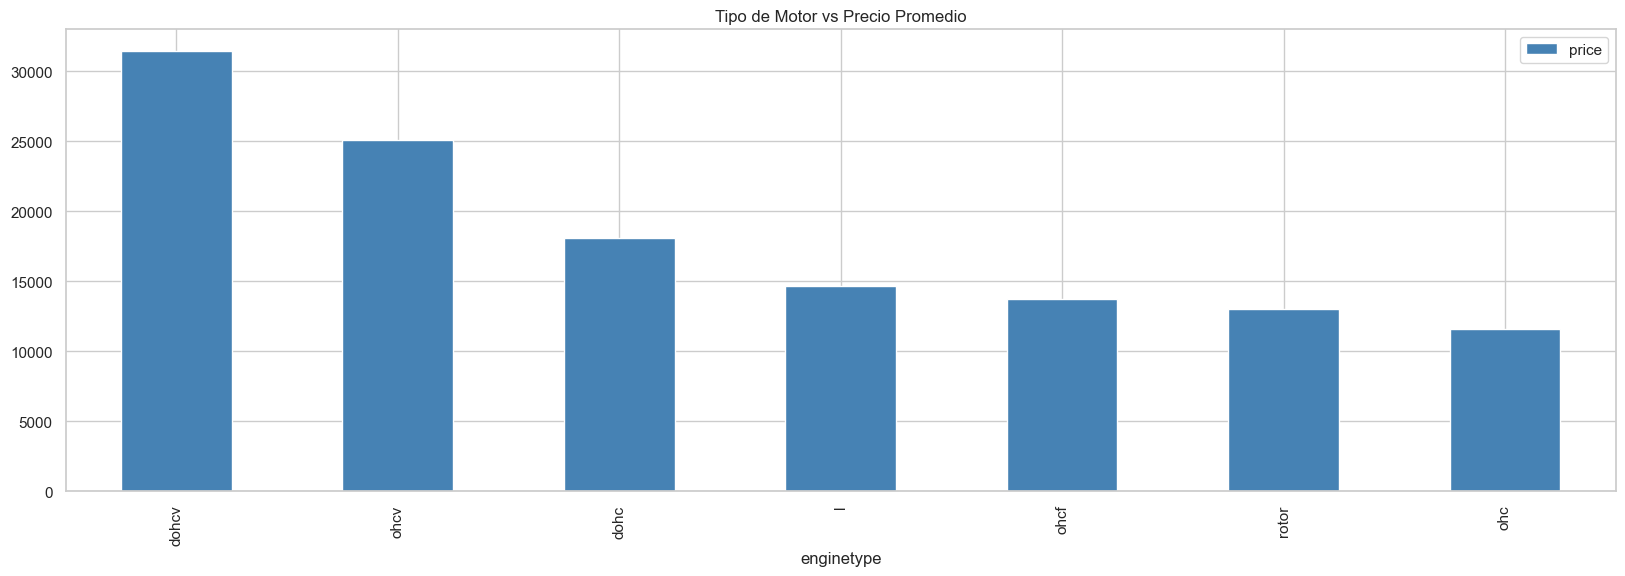

In [19]:
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(20, 8))

# Subgráfico 1 - Histograma Tipo de Motor
plt.subplot(1, 2, 1)
plt.title('Histograma Tipo de Motor')
sns.countplot(data=cars, x='enginetype', palette="Blues_d")

# Subgráfico 2 - Tipo de Motor vs Precio
plt.subplot(1, 2, 2)
plt.title('Tipo de Motor vs Precio')
sns.boxplot(x=cars.enginetype, y=cars.price, palette="PuBuGn")

# Mostrar los gráficos
plt.show()

# Crear DataFrame y plotear el barplot
df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))
df.plot.bar(figsize=(20, 6), color='steelblue')  # Usar un color similar al primer gráfico
plt.title('Tipo de Motor vs Precio Promedio')
plt.show()

## Conclusión:

* El tipo de motor preferido por los consumidores es OHC (Árbol de levas en cabeza).

* Además, se observa que este tipo de motor está asociado con precios más bajos en comparación con otros tipos de motores.

<Figure size 2500x600 with 0 Axes>

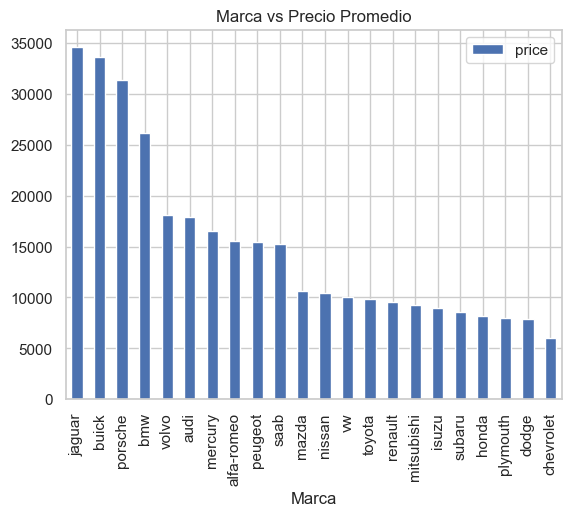

<Figure size 2500x600 with 0 Axes>

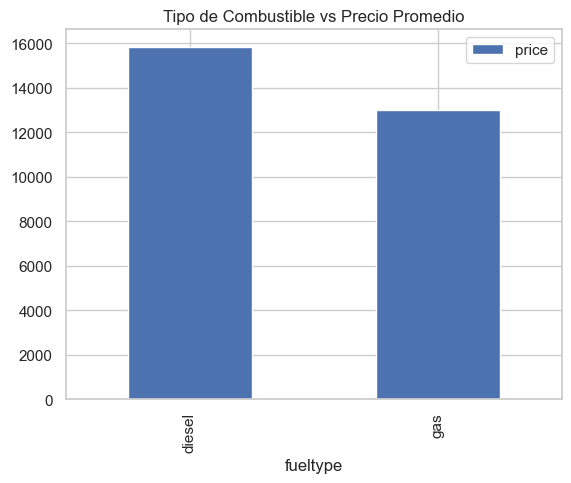

<Figure size 2500x600 with 0 Axes>

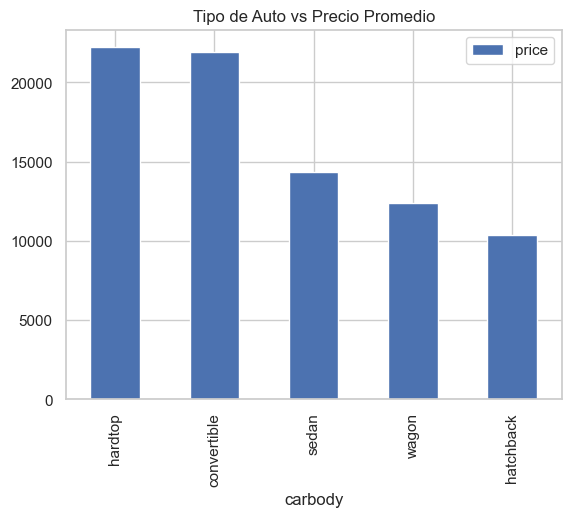

In [20]:
# Gráfico 1: Marca vs Precio Promedio
plt.figure(figsize=(25, 6))
df = pd.DataFrame(cars.groupby(['Marca'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Marca vs Precio Promedio')
plt.show()

# Gráfico 2: Tipo de Combustible vs Precio Promedio
plt.figure(figsize=(25, 6))
df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Tipo de Combustible vs Precio Promedio')
plt.show()

# Gráfico 3: Tipo de Auto vs Precio Promedio
plt.figure(figsize=(25, 6))
df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Tipo de Auto vs Precio Promedio')
plt.show()


## Conclusión:
* Se observa que los vehículos de las marcas Jaguar y Buick presentan un precio promedio más elevado en comparación con otras marcas.

* Además, se destaca que los vehículos con motor diésel muestran un precio promedio superior en comparación con los vehículos que utilizan gasolina.


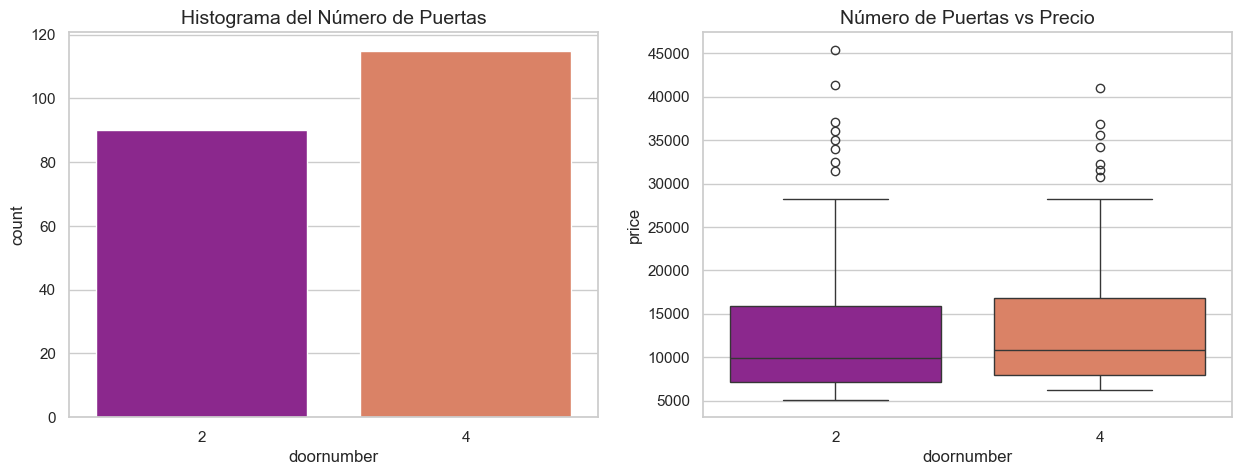

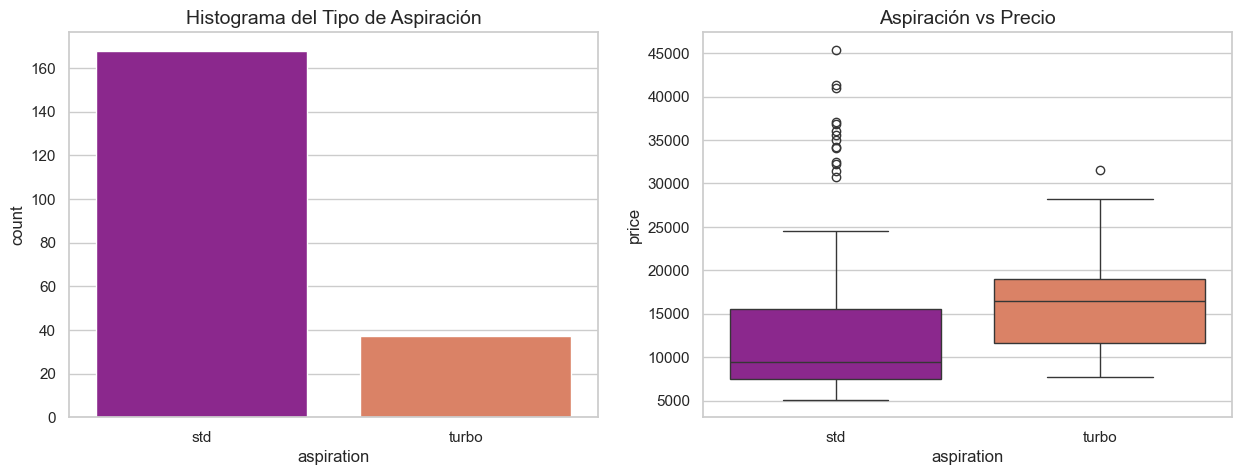

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico 1: Histograma y Boxplot del Número de Puertas
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Histograma del Número de Puertas', fontsize=14)
sns.countplot(data=cars, x='doornumber', palette='plasma')

plt.subplot(1, 2, 2)
plt.title('Número de Puertas vs Precio', fontsize=14)
sns.boxplot(x=cars.doornumber, y=cars.price, palette='plasma')

plt.show()

# Gráfico 2: Histograma y Boxplot del Tipo de Aspiración
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Histograma del Tipo de Aspiración', fontsize=14)
sns.countplot(data=cars, x='aspiration', palette='plasma')

plt.subplot(1, 2, 2)
plt.title('Aspiración vs Precio', fontsize=14)
sns.boxplot(x=cars.aspiration, y=cars.price, palette='plasma')

plt.show()

## Conclusión

* Tras analizar los datos, se observa que el número de puertas no presenta un impacto significativo en los precios de los vehículos.

* Por otro lado, se destaca que los vehículos con aspiración turbo exhiben precios más elevados en comparación con los vehículos estándar. Este hallazgo sugiere que la elección del tipo de aspiración podría ser un factor influyente en la determinación de los precios.


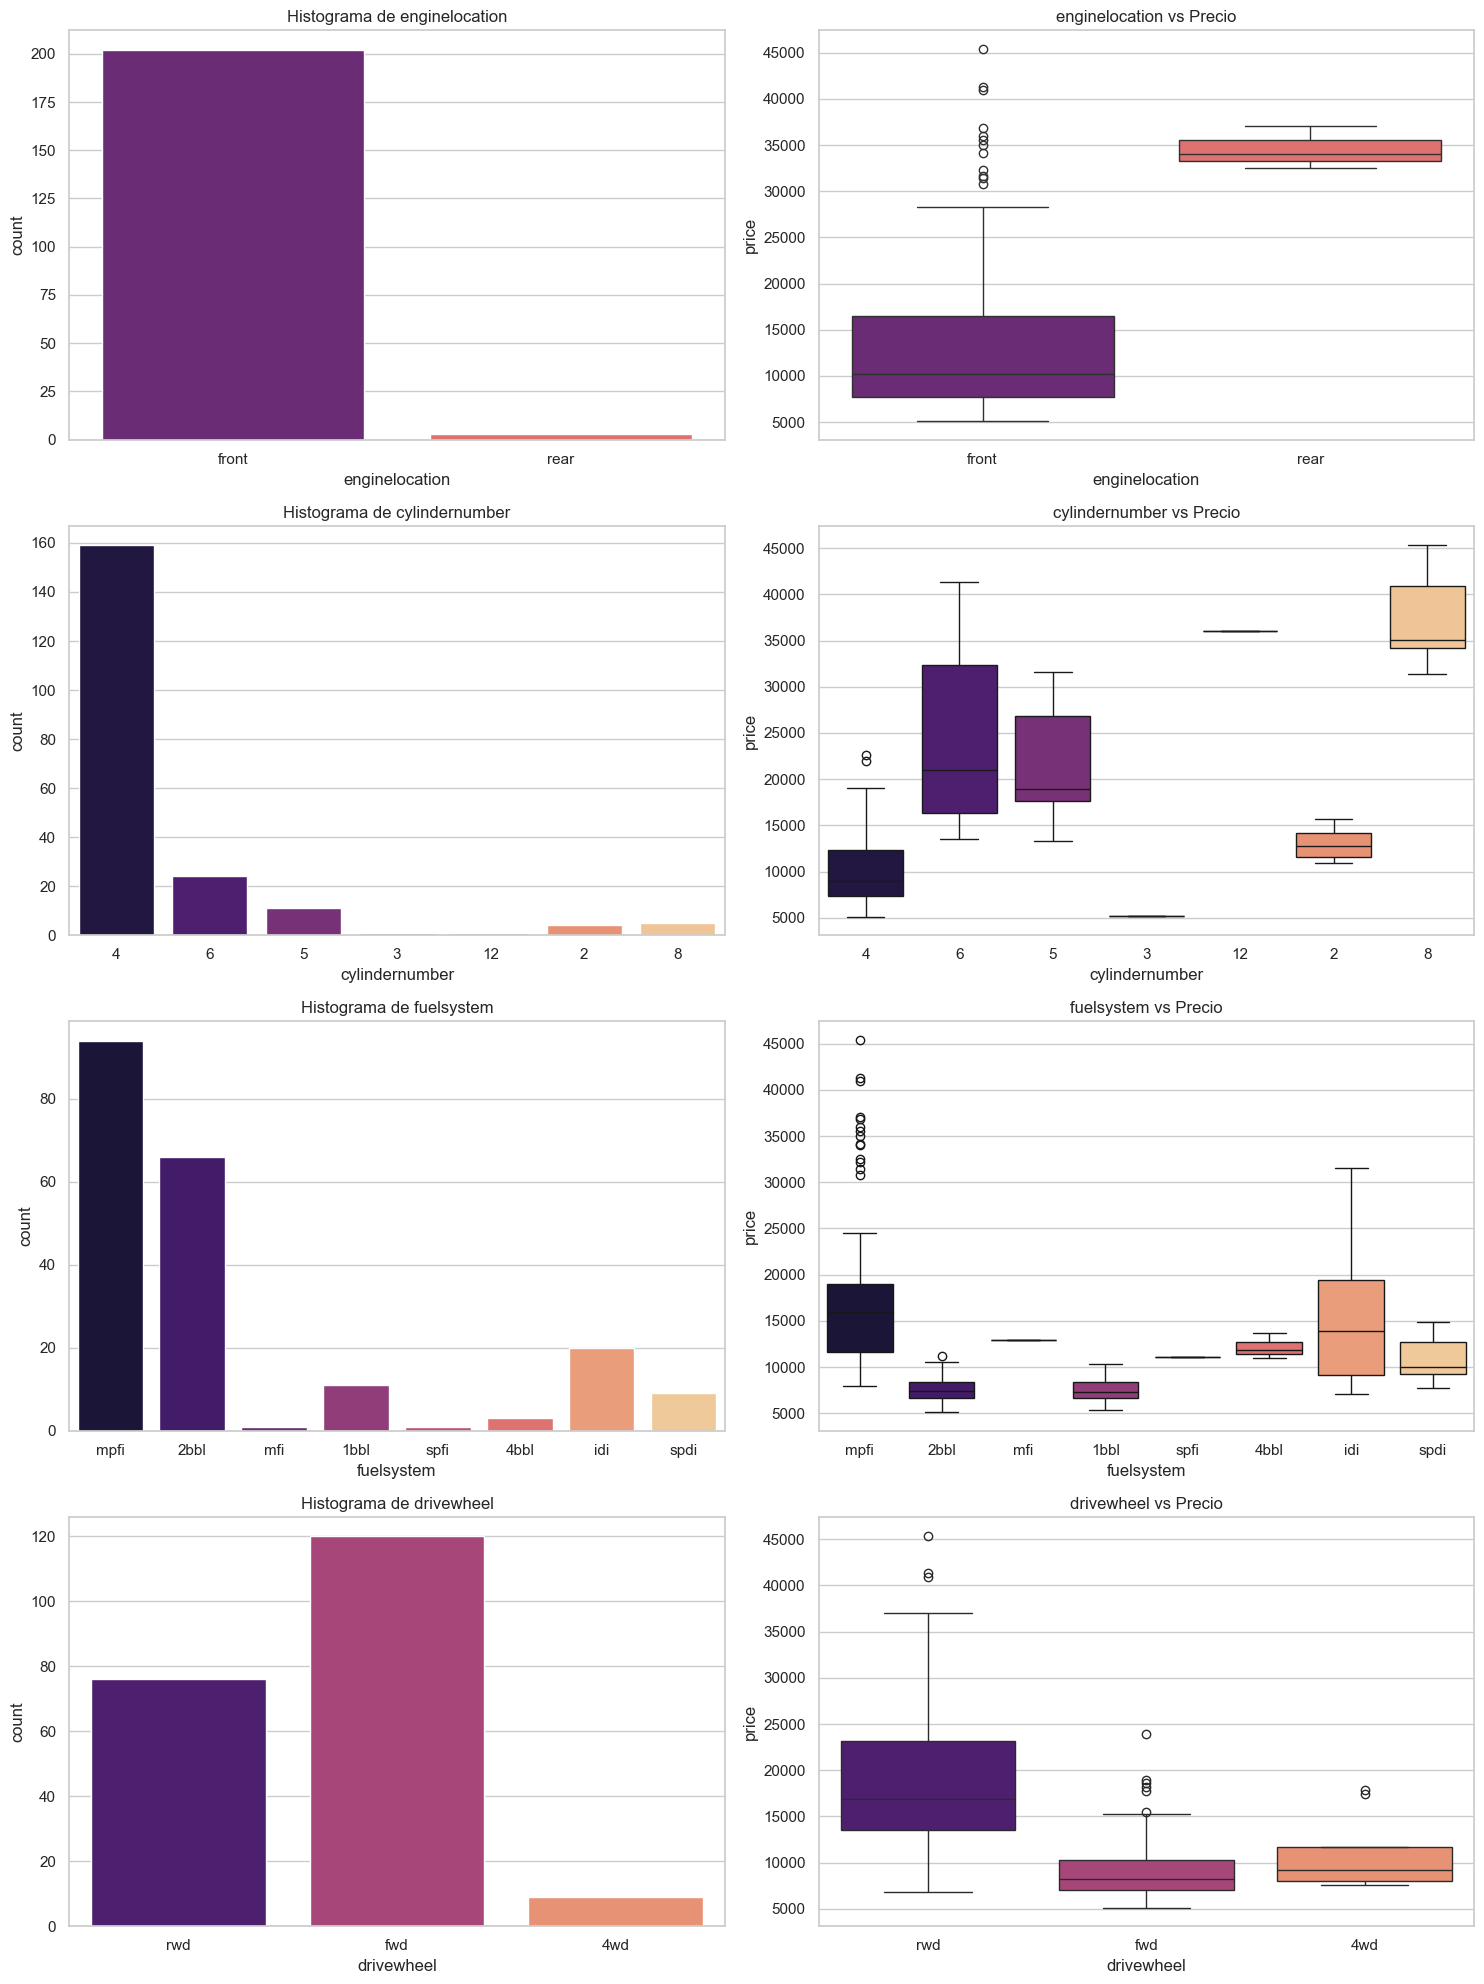

In [22]:
def plot_count(x, fig):
    plt.subplot(4, 2, fig)
    plt.title('Histograma de ' + x)
    sns.countplot(data=cars, x=cars[x], palette="magma")
    
    plt.subplot(4, 2, (fig + 1))
    plt.title(x + ' vs Precio')
    sns.boxplot(x=cars[x], y=cars.price, palette="magma")

plt.figure(figsize=(15, 20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()
plt.show()

## Conclusión

* El número más frecuente de cilindros es cuatro, seguido de seis y cinco. Sin embargo, los motores de ocho cilindros muestran el rango de precios más elevado.

* Los sistemas de combustible mpfi y 2bbl son los más predominantes. mpfi e idi, aunque comunes, presentan precios más altos.

* La mayoría de los vehículos de precio elevado optan por la tracción trasera (rwd).



#### Exploración de Variables Numéricas
Las siguientes variables están bajo revisión:

* carlength
* carwidth
* carheight
* curbweight
* enginesize
* boreratio
* stroke
* compressionratio
* horsepower
* peakrpm
* wheelbase
* citympg
* highwaympg

#### Análisis de Correlación con el Objetivo
- Se lleva a cabo un análisis de la correlación de cada variable con el objetivo.

#### Análisis de Correlación entre Variables
- Se realiza un análisis de la correlación entre variables para detectar posibles colinealidades.


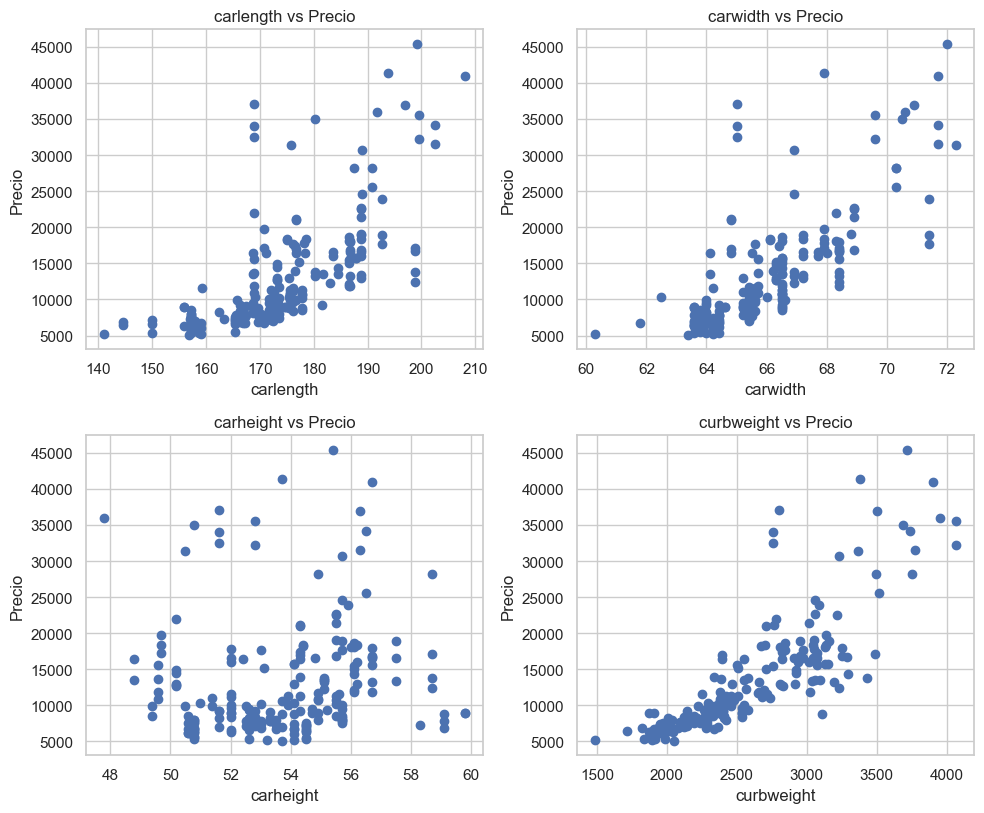

In [23]:
def scatter(x, fig):
    plt.subplot(5, 2, fig)
    plt.scatter(cars[x], cars['price'])
    plt.title(f'{x} vs Precio')
    plt.ylabel('Precio')
    plt.xlabel(x)

plt.figure(figsize=(10, 20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()
plt.show()


## Conclusión

En la revisión detallada de las variables relacionadas con las dimensiones y peso de los autos, hemos identificado patrones importantes que podrían influir en el precio. Aquí están nuestras observaciones clave:

1. **Ancho, Largo y Peso del Auto (carwidth, carlength, curbweight):**
   - Estas variables exhiben una correlación positiva significativa con el precio.
   - A medida que aumenta el ancho, largo y peso del auto, tiende a haber un aumento en el precio.

2. **Altura del Auto (carheight):**
   - No se observa una tendencia significativa con respecto al precio.
   - La altura del auto parece tener una influencia limitada en el costo.

Estas conclusiones proporcionan información valiosa para comprender cómo las dimensiones y el peso de los autos pueden afectar su valor en el mercado. Este análisis puede ser fundamental para la toma de decisiones estratégicas en términos de diseño y posicionamiento de productos.

<Figure size 1500x1200 with 0 Axes>

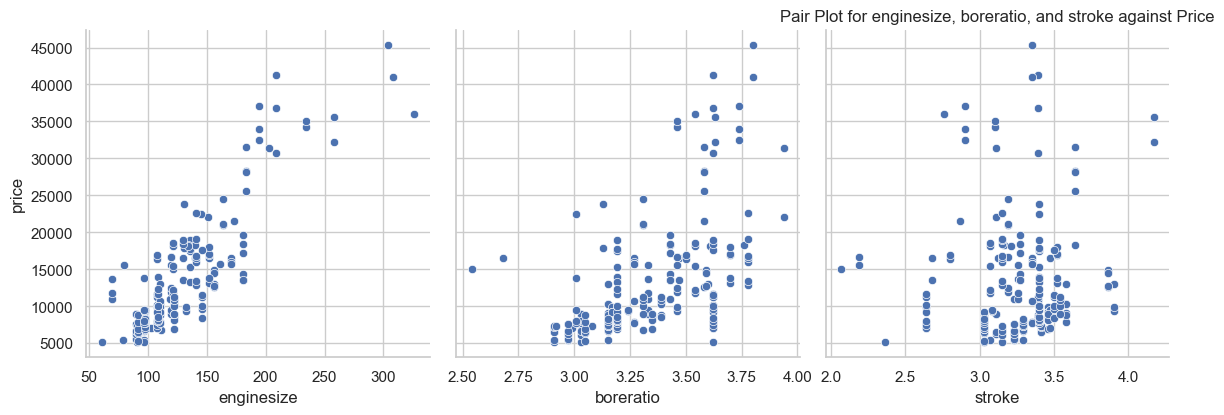

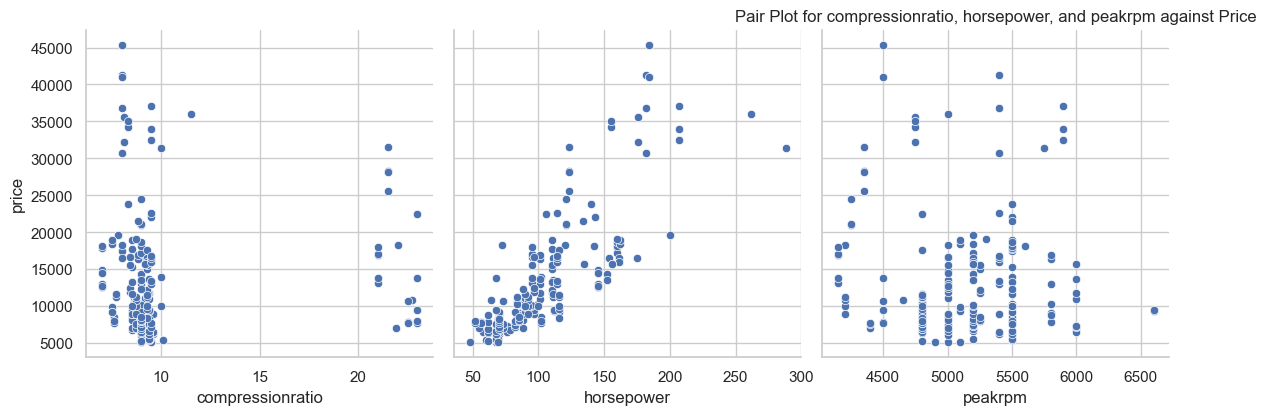

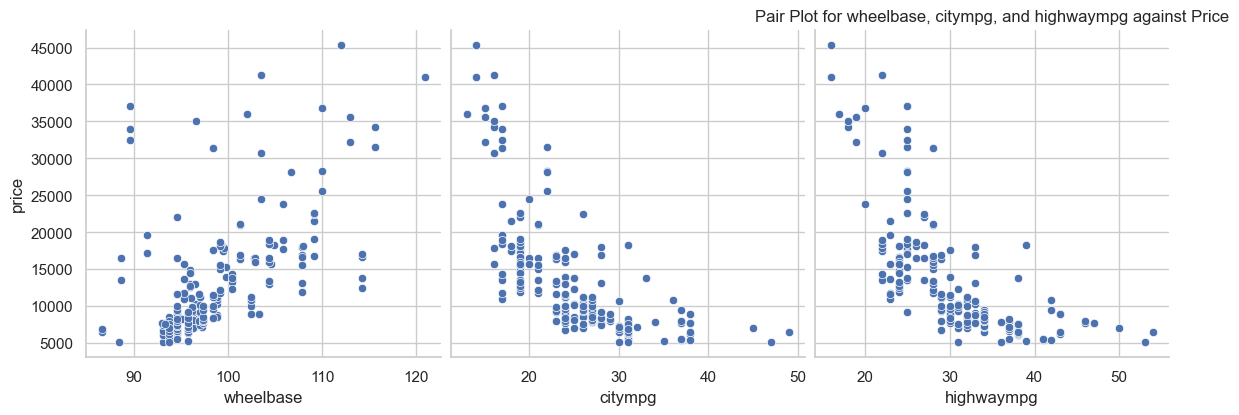

In [24]:
def pair_plot(x, y, z):
    sns.pairplot(cars, x_vars=[x, y, z], y_vars='price', size=4, aspect=1, kind='scatter')
    plt.title(f'Pair Plot for {x}, {y}, and {z} against Price')
    plt.show()

plt.figure(figsize=(15, 12))

pair_plot('enginesize', 'boreratio', 'stroke')
pair_plot('compressionratio', 'horsepower', 'peakrpm')
pair_plot('wheelbase', 'citympg', 'highwaympg')

## Conclusión

Durante el análisis de las variables en relación con el precio de los automóviles, hemos identificado patrones interesantes que pueden influir en el valor de mercado. Aquí están nuestras principales observaciones:

1. **Variables con Correlación Positiva Significativa:**
   - `enginesize`: El tamaño del motor parece estar positivamente correlacionado con el precio, sugiriendo que vehículos con motores más grandes tienden a tener precios más altos.
   - `boreratio`: La relación de diámetro del cilindro también muestra una correlación positiva, indicando que autos con un mayor diámetro de cilindro tienden a ser más caros.
   - `horsepower`: La potencia del motor tiene una influencia positiva en el precio, lo que tiene sentido dada la relación con el rendimiento del vehículo.
   - `wheelbase`: El espacio entre ejes muestra una correlación positiva, sugiriendo que vehículos con una mayor distancia entre ejes pueden tener precios más altos.

2. **Variables con Correlación Negativa Significativa:**
   - `citympg` y `highwaympg`: El consumo de combustible en ciudad y carretera muestra una correlación negativa, indicando que autos más eficientes en combustible tienden a tener precios más bajos.

Estos hallazgos proporcionan información valiosa para comprender las dinámicas del mercado automotriz y podrían ser considerados en la toma de decisiones estratégicas.

In [25]:
# Creamos una variable numerica que contenga a todas para ver correlaciones
variables_numericas = cars[["car_ID",'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']]
corr_var_num = variables_numericas.corr()

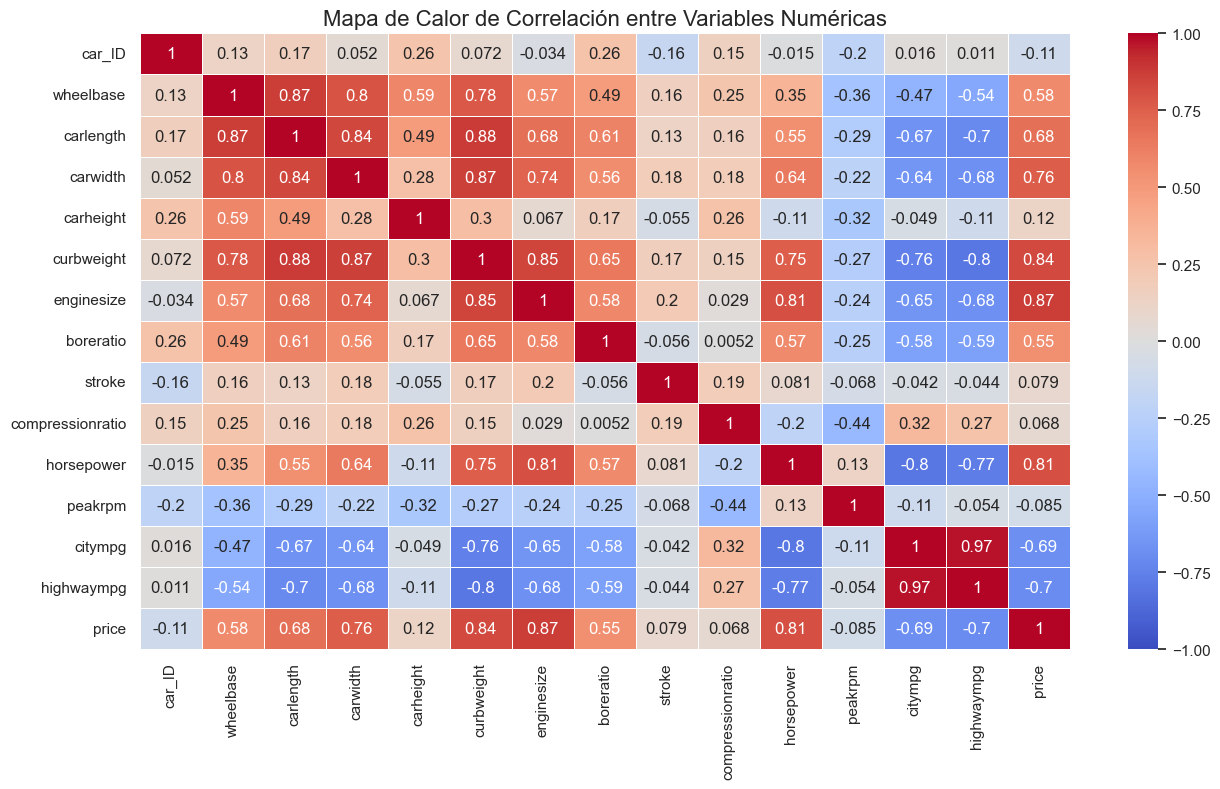

In [26]:
# Reflejamos la correlación de cada variable mediante un mapa de calor."

# Configuración del tamaño de la figura
sns.set(rc={'figure.figsize': (15, 8)})

# Crear un mapa de calor con anotaciones, rango de colores mejorado y barras de colores
sns.heatmap(corr_var_num, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)

# Añadir título y mostrar el mapa de calor
plt.title('Mapa de Calor de Correlación entre Variables Numéricas', fontsize=16)
plt.show()

## Preparación de datos para la Generación de Modelos

### Generación de Variables Dummy

In [27]:
variables_categoricas

['Marca',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [28]:
dfCars = pd.get_dummies(cars, columns= variables_categoricas,
                        drop_first= False, dtype=int)

dfCars.head()

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,2,94.5,171.2,65.5,52.4,2823,6,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,4,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,4,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,0,0,1,0,0


In [29]:
dfCars.columns

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Modelo',
       'Marca_alfa-romeo', 'Marca_audi', 'Marca_bmw', 'Marca_buick',
       'Marca_chevrolet', 'Marca_dodge', 'Marca_honda', 'Marca_isuzu',
       'Marca_jaguar', 'Marca_mazda', 'Marca_mercury', 'Marca_mitsubishi',
       'Marca_nissan', 'Marca_peugeot', 'Marca_plymouth', 'Marca_porsche',
       'Marca_renault', 'Marca_saab', 'Marca_subaru', 'Marca_toyota',
       'Marca_volvo', 'Marca_vw', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
   

## Aprendizaje Supervisado por Modelos de Regresión

### Modelo de Regresión lineal

In [30]:
# Creamos las variables features (X) y variables objetivo (y)

feature_cols=['symboling', 'doornumber', 
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 
       'Marca_alfa-romeo', 'Marca_audi', 'Marca_bmw', 'Marca_buick',
       'Marca_chevrolet', 'Marca_dodge', 'Marca_honda', 'Marca_isuzu',
       'Marca_jaguar', 'Marca_mazda', 'Marca_mercury', 'Marca_mitsubishi',
       'Marca_nissan', 'Marca_peugeot', 'Marca_plymouth', 'Marca_porsche',
       'Marca_renault', 'Marca_saab', 'Marca_subaru', 'Marca_toyota',
       'Marca_volvo', 'Marca_vw', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi']
X= dfCars[feature_cols]
y= dfCars.price

#### Entrenamiento del modelo

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42) 
linear_model = LinearRegression()
linear_model.fit(X, y)
from sklearn import metrics

y_pred=linear_model.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))

MAE: 1263.4663883402268
MSE: 3777743.0969140856
RMSE: 1943.6417100160425
R2: 0.9454748217039045


In [32]:
def visualizar_modelo_regresion(y, y_pred):
    # Crear figura con dos subgráficos
    plt.figure(figsize=(12, 6))

    # Gráfico de dispersión
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, y)
    plt.xlabel("Predicciones del Modelo")
    plt.ylabel("Valor Real")

    # Límite del eje
    plt.plot([0, np.max(y) + 2 * np.min(y)], [0, np.max(y) + 2 * np.min(y)], '-', color="r")

    # Gráfico de distribución
    plt.subplot(1, 2, 2)
    sns.distplot(y, hist=False, color="r", label="Valor Real")
    sns.distplot(y_pred, hist=False, color="b", label="Predicciones del Modelo", axlabel="Distribución")
    plt.legend()
    plt.show()


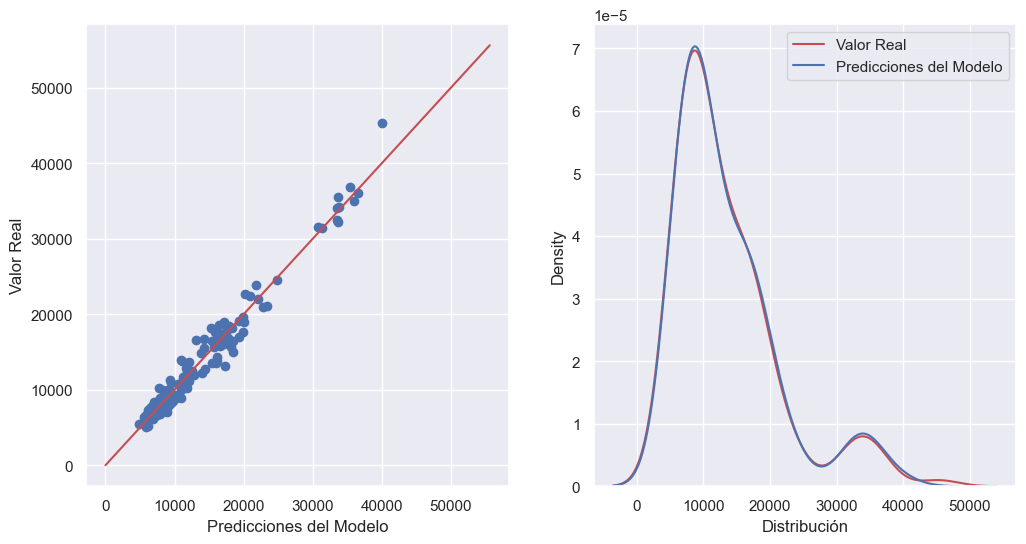

In [33]:
visualizar_modelo_regresion(y_train, linear_model.predict (X_train))

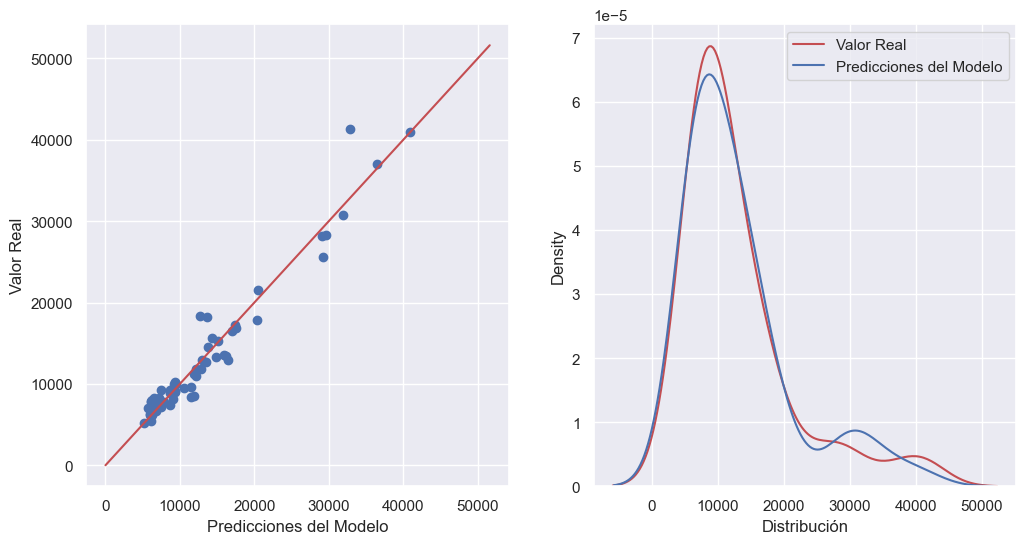

In [34]:
visualizar_modelo_regresion(y_test, linear_model.predict (X_test))

### Modelo de Regresión Lineal con Validación Cruzada

In [35]:
def regresion(feature_cols):

    X = dfCars[feature_cols]
    y = dfCars.price
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
    linreg = LinearRegression()
 
    linreg.fit(X_train, y_train)
 
    score = linreg.score(X_train,y_train)
 
    print("Metrica del modelo sin cross validation", score)
    
    kf = KFold(n_splits=7, shuffle=True, random_state=68)
 
    cv_scores = cross_val_score(linreg, X_train, y_train, cv=kf)
    
    cv_scores = [round(num, 3) for num in cv_scores]
    print('Se obtienen los siguientes coeficientes de determinación con cross validation:')
    print(cv_scores)
    print(f'Max R-Squared: {max(cv_scores)}')
    print(f'Min R-Squared: {min(cv_scores)}')
    print('Promedio R-Squared: {:.3f}'.format(np.mean(cv_scores)))
    print('Desviación Estándar: {:.3f}'.format(np.std(cv_scores)))
    print(f'Intervalo de confianza 95%: {np.quantile(cv_scores, [0.025, 0.975])}', '\n')
 
    y_pred = linreg.predict(X_test)
    print ('Metricas en Test')
    print ('Test MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('Test MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('test R2:', metrics.r2_score(y_test, y_pred))

In [36]:
regresion(feature_cols)

Metrica del modelo sin cross validation 0.971748887456009
Se obtienen los siguientes coeficientes de determinación con cross validation:
[0.81, 0.906, 0.869, 0.883, 0.922, 0.951, 0.935]
Max R-Squared: 0.951
Min R-Squared: 0.81
Promedio R-Squared: 0.897
Desviación Estándar: 0.044
Intervalo de confianza 95%: [0.81885 0.9486 ] 

Metricas en Test
Test MAE: 1981.927703435221
Test MSE: 9542382.701331917
Test RMSE: 3089.0747322348675
test R2: 0.8767394524818029


#### Colinealidades 
- carlength y wheelbase
- curbweight y engine size


In [37]:
# La realizamos sin colinealidades para mejorar el modelo
feature_cols_sin_colinealidades = ['symboling','doornumber', 'wheelbase',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm', 'citympg', 
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Marca_alfa-romeo', 'Marca_audi',
       'Marca_bmw', 'Marca_buick', 'Marca_chevrolet', 'Marca_dodge',
       'Marca_honda', 'Marca_isuzu', 'Marca_jaguar', 'Marca_mazda',
       'Marca_mercury', 'Marca_mitsubishi', 'Marca_nissan', 'Marca_peugeot',
       'Marca_plymouth', 'Marca_porsche', 'Marca_renault', 'Marca_saab',
       'Marca_subaru', 'Marca_toyota', 'Marca_volvo', 'Marca_vw']

In [38]:
regresion(feature_cols_sin_colinealidades)

Metrica del modelo sin cross validation 0.9729382264568909
Se obtienen los siguientes coeficientes de determinación con cross validation:
[0.842, 0.892, 0.874, 0.892, 0.931, 0.966, 0.938]
Max R-Squared: 0.966
Min R-Squared: 0.842
Promedio R-Squared: 0.905
Desviación Estándar: 0.039
Intervalo de confianza 95%: [0.8468 0.9618] 

Metricas en Test
Test MAE: 1963.0970244048815
Test MSE: 9694351.714455325
Test RMSE: 3113.575390841745
test R2: 0.8747764434148141


## Conclusiones

1. **Desempeño del Modelo de Regresión Lineal:**
   - El coeficiente de determinación \(R^2\) obtenido fue de 0.94, indicando una fuerte capacidad del modelo para explicar la variabilidad de los datos.

2. **Validación Cruzada del Modelo de Regresión Lineal:**
   - La aplicación de validación cruzada al modelo de regresión lineal resultó en un \(R^2\) de 0.87, evidenciando una buena capacidad predictiva del modelo en diferentes conjuntos de datos.

Estos resultados respaldan la efectividad del modelo de regresión lineal en la predicción de la variable objetivo y su robustez al generalizar en diferentes escenarios.

## Aprendizaje Supervisado por Modelos de Clasificación

### Modelo de Clasificación

**Objetivo:**
Se requiere la diferenciación entre automóviles de alta y baja gama mediante la aplicación de un modelo clasificador. La distinción se realizará utilizando la mediana como umbral de separación.

In [39]:
medianaPrice=dfCars['price'].median()
medianaPrice

10295.0

In [40]:
# Dividimos el dataset en alta y baja gama

condicion = lambda x: '1' if x > medianaPrice else '0'
dfCars['gama'] = dfCars.apply(lambda x: '1' if x['price']>medianaPrice else '0',axis=1)

In [41]:
dfCars['gama']= dfCars['gama'].astype(float)

In [42]:
X = dfCars[feature_cols]
y = dfCars.gama

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import normalize

### Utilizaremos 3 modelos 
 - Regresión logística
 - Árbol de decisión
 - K-Nearest Neighbors (KNN) Vecinos Cercanos

##### Entrenamos el modelo


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# Utilizamos sklearn para estandarizar la matríz de Features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#### Estimación de Hiperparámetros después de Escalar los Datos

Después de la aplicación de la escala a los datos, se han creado dos listas esenciales para el proceso de modelado. La primera lista contiene los estimadores de los modelos, mientras que la segunda almacena los parámetros de la Grid para la estimación en cada modelo. Un enfoque iterativo se llevará a cabo sobre estas listas para obtener la estimación óptima de los hiperparámetros en cada modelo.


In [46]:
models = [LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier()]

In [48]:
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2',],
     'solver': ['saga']},
    {'n_neighbors': range(1,50),
     'weights' : ['uniform', 'distance'],
     'p' : [1, 2, 3]},
    { "criterion" : ["gini", "entropy"],
      "min_samples_leaf": [5,10,15,20,None], 
      "max_depth" : [1,3,4,5,8,9,10,11,12,13,14,None],
      "min_samples_split": [2, 3, 4,None]}
]

In [49]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [50]:
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='accuracy')
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14,
                                       None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min

#### Resultados de GridSearch
- Mejor modelo Regresion logistica

In [51]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.9327205882352942
LogisticRegression(C=1, solver='saga')
{'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.9150735294117647
KNeighborsClassifier(n_neighbors=1, p=1)
{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.9084558823529412
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [52]:
pd.DataFrame(grids[0].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.105134,0.024866,0.011792,0.014882,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",1.0,0.941176,...,0.882353,0.875,0.9375,0.9375,0.8750,1.0,0.875,0.914706,0.055118,8
1,0.220564,0.113701,0.013792,0.019996,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",1.0,0.941176,...,0.941176,0.875,0.9375,0.9375,0.9375,1.0,0.875,0.932721,0.042971,1
2,0.095840,0.013163,0.003798,0.002675,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",1.0,0.941176,...,0.941176,0.875,0.9375,0.9375,0.9375,1.0,0.875,0.932721,0.042971,1
3,0.072854,0.009443,0.003198,0.001249,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",1.0,0.941176,...,0.941176,0.875,0.9375,0.9375,0.9375,1.0,0.875,0.932721,0.042971,1
4,0.118625,0.027894,0.008495,0.010502,100,l1,saga,"{'C': 100, 'penalty': 'l1', 'solver': 'saga'}",1.0,0.941176,...,0.941176,0.875,0.9375,0.9375,0.9375,1.0,0.875,0.932721,0.042971,1
5,0.070655,0.005288,0.004098,0.002071,100,l2,saga,"{'C': 100, 'penalty': 'l2', 'solver': 'saga'}",1.0,0.941176,...,0.941176,0.875,0.9375,0.9375,0.9375,1.0,0.875,0.932721,0.042971,1
6,0.092941,0.008747,0.002999,0.000895,1000,l1,saga,"{'C': 1000, 'penalty': 'l1', 'solver': 'saga'}",1.0,0.941176,...,0.941176,0.875,0.9375,0.9375,0.9375,1.0,0.875,0.932721,0.042971,1
7,0.065259,0.007982,0.002998,0.000774,1000,l2,saga,"{'C': 1000, 'penalty': 'l2', 'solver': 'saga'}",1.0,0.941176,...,0.941176,0.875,0.9375,0.9375,0.9375,1.0,0.875,0.932721,0.042971,1


In [53]:
pd.DataFrame(grids[1].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004296,0.002147,0.233457,0.281452,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",1.000000,0.941176,...,0.823529,0.8750,0.8750,1.0000,1.0000,0.9375,0.8750,0.915074,0.066633,1
1,0.003897,0.001221,0.005497,0.002155,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",1.000000,0.941176,...,0.823529,0.8750,0.8750,1.0000,1.0000,0.9375,0.8750,0.915074,0.066633,1
2,0.004597,0.003038,0.007095,0.006087,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.941176,0.882353,...,0.882353,0.8750,0.8750,1.0000,0.9375,0.8125,0.8750,0.896324,0.048407,7
3,0.003798,0.002481,0.006297,0.004625,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.941176,0.882353,...,0.882353,0.8750,0.8750,1.0000,0.9375,0.8125,0.8750,0.896324,0.048407,7
4,0.004097,0.002842,0.012593,0.002416,1,3,uniform,"{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}",0.941176,0.882353,...,0.882353,0.8750,0.8750,1.0000,0.9375,0.8125,0.8750,0.896324,0.048407,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.003597,0.001496,0.005097,0.001639,49,1,distance,"{'n_neighbors': 49, 'p': 1, 'weights': 'distan...",1.000000,0.941176,...,0.823529,0.8750,0.8750,0.9375,0.9375,0.8125,0.8750,0.890074,0.058949,15
290,0.003696,0.001268,0.007396,0.002107,49,2,uniform,"{'n_neighbors': 49, 'p': 2, 'weights': 'uniform'}",0.764706,0.823529,...,0.882353,0.8125,0.8125,0.6875,0.8750,0.7500,0.8750,0.798897,0.066442,217
291,0.003197,0.001399,0.004697,0.000899,49,2,distance,"{'n_neighbors': 49, 'p': 2, 'weights': 'distan...",0.941176,0.941176,...,0.823529,0.8750,0.8750,0.8125,0.8750,0.8125,0.8125,0.853309,0.055305,136
292,0.003797,0.001938,0.015190,0.004953,49,3,uniform,"{'n_neighbors': 49, 'p': 3, 'weights': 'uniform'}",0.588235,0.529412,...,0.705882,0.5625,0.5625,0.5625,0.6875,0.6875,0.8125,0.634559,0.084434,291


In [54]:
pd.DataFrame(grids[2].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006694,0.002721,0.003398,0.001019,gini,1,5,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.882353,...,0.823529,0.8125,0.875,0.8125,0.9375,0.875,0.875,0.848162,0.079722,199
1,0.004597,0.000663,0.004197,0.002674,gini,1,5,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.882353,...,0.823529,0.8125,0.875,0.8125,0.9375,0.875,0.875,0.848162,0.079722,199
2,0.004197,0.000600,0.005697,0.004997,gini,1,5,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.882353,...,0.823529,0.8125,0.875,0.8125,0.9375,0.875,0.875,0.848162,0.079722,199
3,0.001899,0.000538,0.000000,0.000000,gini,1,5,None,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
4,0.007096,0.007445,0.003897,0.001445,gini,1,10,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.882353,...,0.823529,0.8125,0.875,0.8125,0.9375,0.875,0.875,0.848162,0.079722,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.001500,0.000671,0.000000,0.000000,entropy,None,20,None,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
476,0.001202,0.000400,0.000000,0.000000,entropy,None,None,2,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
477,0.001201,0.000399,0.000000,0.000000,entropy,None,None,3,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
478,0.001000,0.000448,0.000000,0.000000,entropy,None,None,4,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289


### Evaluación de performance

In [55]:
X_test = scaler.transform(X_test)

In [56]:
y_preds_log = grids[0].predict(X_test)
y_preds_knn = grids[1].predict(X_test)
y_preds_tree = grids[2].predict(X_test)

#### Resultados del Modelo de Regresión Logística

In [57]:
print (classification_report(y_test, y_preds_log))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        25
         1.0       1.00      0.81      0.90        16

    accuracy                           0.93        41
   macro avg       0.95      0.91      0.92        41
weighted avg       0.93      0.93      0.93        41



In [58]:
confusion_matrix(y_test, y_preds_log)

array([[25,  0],
       [ 3, 13]], dtype=int64)

#### Resultados de Modelo de Regresion KNN Vecinos Cercanos

In [59]:
print (classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        25
         1.0       1.00      0.81      0.90        16

    accuracy                           0.93        41
   macro avg       0.95      0.91      0.92        41
weighted avg       0.93      0.93      0.93        41



In [60]:
confusion_matrix(y_test, y_preds_knn)

array([[25,  0],
       [ 3, 13]], dtype=int64)

#### Resultados del Modelo de Arbol de Decisión

In [61]:
print (classification_report(y_test, y_preds_tree))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        25
         1.0       0.93      0.88      0.90        16

    accuracy                           0.93        41
   macro avg       0.93      0.92      0.92        41
weighted avg       0.93      0.93      0.93        41



In [62]:
confusion_matrix(y_test, y_preds_tree)

array([[24,  1],
       [ 2, 14]], dtype=int64)

### Analizamos curva ROC y AUC para cada modelo

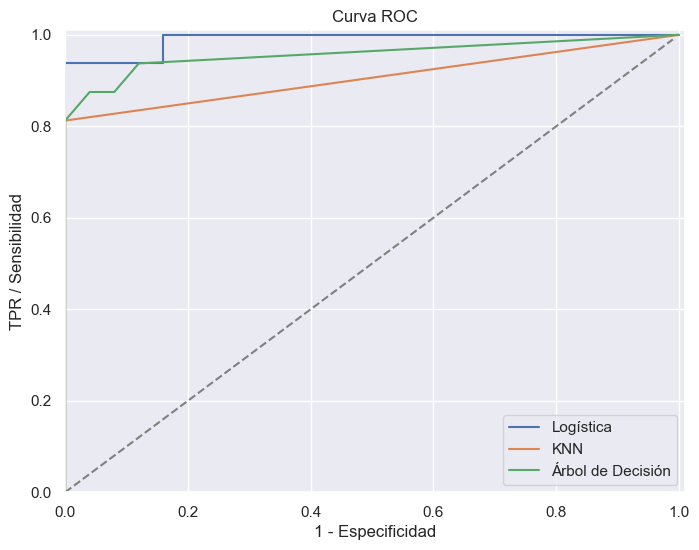

In [63]:
# Cálculo de las curvas ROC y visualización

from sklearn.metrics import roc_curve

# Predicciones de probabilidad para cada modelo
y_pred_proba_log = grids[0].predict_proba(X_test)
y_pred_proba_knn = grids[1].predict_proba(X_test)
y_pred_proba_tree = grids[2].predict_proba(X_test)

# Cálculo de las curvas ROC para cada modelo
fpr_l, tpr_l, thr_l = roc_curve(y_test, y_pred_proba_log[:, 1])
fpr_k, tpr_k, thr_k = roc_curve(y_test, y_pred_proba_knn[:, 1])
fpr_t, tpr_t, thr_t = roc_curve(y_test, y_pred_proba_tree[:, 1])

# Creación de DataFrames para facilitar la visualización
df_l = pd.DataFrame(dict(fpr=fpr_l, tpr=tpr_l, thr=thr_l))
df_k = pd.DataFrame(dict(fpr=fpr_k, tpr=tpr_k, thr=thr_k))
df_t = pd.DataFrame(dict(fpr=fpr_t, tpr=tpr_t, thr=thr_t))

# Configuración y visualización de la curva ROC
plt.figure(figsize=(8, 6))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Especificidad')
plt.ylabel('TPR / Sensibilidad')
plt.title('Curva ROC')
plt.plot(df_l['fpr'], df_l['tpr'])
plt.plot(df_k['fpr'], df_k['tpr'])
plt.plot(df_t['fpr'], df_t['tpr'])
plt.legend(['Logística', 'KNN', 'Árbol de Decisión'])

# Línea de referencia
plt.plot(np.arange(0, 1, step=0.01), np.arange(0, 1, step=0.01), linestyle='--', color='gray')

plt.show()


In [64]:
from sklearn.metrics import auc
print('AUC log=', auc(fpr_l, tpr_l))
print('AUC knn=', auc(fpr_k, tpr_k))
print('AUC tree=', auc(fpr_t, tpr_t))

AUC log= 0.99
AUC knn= 0.90625
AUC tree= 0.9575


## Conclusión
- El caso del análisis supervisado de clasificación por precios de gamma alta o baja nos arrojo una accuracy alta de acuerdo a los modelos aquí presentados.
- Luego presentar las métricas en la curva ROC y los parametros AUC para cada tipo de modelo, se puede afirmar el modelo de Regresión Logaritmica es el de mayor performance.

## Conclusión
El análisis supervisado de clasificación se ha centrado en la categorización de precios en segmentos de gamma alta o baja. A través de una evaluación exhaustiva de múltiples modelos, hemos obtenido resultados prometedores.

## Resultados Clave

- **Precisión Sobresaliente:** Los modelos de clasificación lograron una precisión notable en la segmentación de precios.
  
- **Curva ROC y AUC:** La evaluación de las métricas, particularmente la curva ROC y el área bajo la curva (AUC), destacó la eficacia del modelo de Regresión Logística.